In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_csv("datasetsolar.csv")

In [4]:
df = pd.DataFrame(columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','Radiation'])

In [5]:
#df.loc[0]=df1.iloc[0]

In [6]:
df1.shape

(43800, 14)

In [99]:
import tensorflow as tf

In [100]:
#df.loc[0]=df1.iloc[0].tolist()

In [7]:
df1.shape

(43800, 14)

In [8]:
df1.head()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Dew Point  Temperature  \
0  2012      1    1     0      30    0    0    0         -5    10.796184   
1  2012      1    1     1      30    0    0    0         -5    10.293036   
2  2012      1    1     2      30    0    0    0         -5     9.844070   
3  2012      1    1     3      30    0    0    0         -5     9.457603   
4  2012      1    1     4      30    0    0    0         -5     9.112615   

     Pressure  Relative Humidity  Wind Direction  Wind Speed  
0  984.308411          31.520793       67.788605    3.121760  
1  984.200317          32.696968       66.973656    3.058262  
2  983.793335          33.539323       67.320267    2.979188  
3  983.602722          34.166898       70.372833    2.963390  
4  983.454895          34.658328       74.828423    2.998623

In [9]:
df1.columns=['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed']

In [10]:
df1.head()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  DewPoint  Temperature  \
0  2012      1    1     0      30    0    0    0        -5    10.796184   
1  2012      1    1     1      30    0    0    0        -5    10.293036   
2  2012      1    1     2      30    0    0    0        -5     9.844070   
3  2012      1    1     3      30    0    0    0        -5     9.457603   
4  2012      1    1     4      30    0    0    0        -5     9.112615   

     Pressure  RelativeHumidity  WindDirection  WindSpeed  
0  984.308411         31.520793      67.788605   3.121760  
1  984.200317         32.696968      66.973656   3.058262  
2  983.793335         33.539323      67.320267   2.979188  
3  983.602722         34.166898      70.372833   2.963390  
4  983.454895         34.658328      74.828423   2.998623

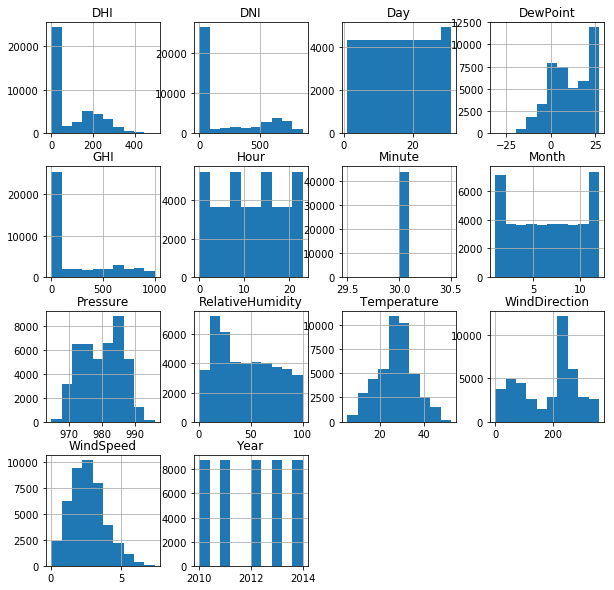

In [11]:
df1.hist(figsize=(10,10))
plt.show()

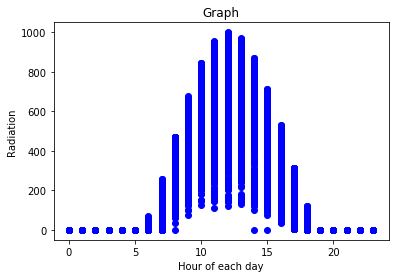

In [12]:
plt.scatter(df1.Hour,df1.GHI,color='blue')
plt.xlabel("Hour of each day")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [13]:
i=0
k=0
while k<=43799:
    if(df1.iloc[i].Hour<6 or df1.iloc[i].Hour>18):
        df1=df1.drop(df1.index[i])
        i=i-1
    i=i+1
    k=k+1

In [14]:
df1.head()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  DewPoint  Temperature  \
6   2012      1    1     6      30    0    0    0         7    10.147851   
7   2012      1    1     7      30    0    0    0         6    10.823430   
8   2012      1    1     8      30   93  244  143         6    13.290619   
9   2012      1    1     9      30  163  358  300         6    17.022489   
10  2012      1    1    10      30  196  513  464         6    20.635430   

      Pressure  RelativeHumidity  WindDirection  WindSpeed  
6   986.633240         81.514445      17.554436   3.014178  
7   987.400452         75.612756      17.263657   3.005211  
8   987.956726         62.527177      20.917732   2.676492  
9   988.381958         48.295760      23.813614   2.756730  
10  987.935852         38.850462      23.945595   3.049551

In [15]:
df1=df1.drop(['Year'],axis=1)

In [16]:
df1=df1.drop(['WindDirection'],axis=1)

In [17]:
df1=df1.drop(['Month'],axis=1)

In [18]:
df1=df1.drop(['Day'],axis=1)

In [19]:
df1=df1.drop(['Minute'],axis=1)

In [20]:
df1=df1.drop(['DHI'],axis=1)

In [21]:
df1=df1.drop(['DNI'],axis=1)

In [22]:
df2=df1

In [23]:
df1.head()

Hour  GHI  DewPoint  Temperature    Pressure  RelativeHumidity  WindSpeed
6      6    0         7    10.147851  986.633240         81.514445   3.014178
7      7    0         6    10.823430  987.400452         75.612756   3.005211
8      8  143         6    13.290619  987.956726         62.527177   2.676492
9      9  300         6    17.022489  988.381958         48.295760   2.756730
10    10  464         6    20.635430  987.935852         38.850462   3.049551

In [24]:
df2.head()

Hour  GHI  DewPoint  Temperature    Pressure  RelativeHumidity  WindSpeed
6      6    0         7    10.147851  986.633240         81.514445   3.014178
7      7    0         6    10.823430  987.400452         75.612756   3.005211
8      8  143         6    13.290619  987.956726         62.527177   2.676492
9      9  300         6    17.022489  988.381958         48.295760   2.756730
10    10  464         6    20.635430  987.935852         38.850462   3.049551

In [25]:
from sklearn.model_selection import train_test_split

df1 = (df1 - df1.mean()) / (df1.max() - df1.min())

X=df1[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Hour','DewPoint']]


Y=df1.GHI

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

X1=df2[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Hour','DewPoint']]


Y1=df2.GHI

X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, random_state= 0)

def model_score_error(model):
    prepared_model=model.fit(X1_train, Y1_train)
    x=prepared_model.score(X1_test,Y1_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X1_test) 

In [26]:
X_test.shape

(5932, 6)

In [27]:
from sklearn.neural_network import MLPRegressor

In [28]:
df1.shape

(23725, 7)

In [29]:
df1.head()

Hour       GHI  DewPoint  Temperature  Pressure  RelativeHumidity  \
6  -0.500000 -0.434394 -0.061280    -0.423720  0.208902          0.421689   
7  -0.416667 -0.434394 -0.078522    -0.409479  0.233405          0.362398   
8  -0.333333 -0.291537 -0.078522    -0.357469  0.251171          0.230936   
9  -0.250000 -0.134694 -0.078522    -0.278798  0.264752          0.087961   
10 -0.166667  0.029142 -0.078522    -0.202635  0.250504         -0.006930   

    WindSpeed  
6    0.087242  
7    0.086027  
8    0.041465  
9    0.052342  
10   0.092037

In [30]:
df2.head()

Hour  GHI  DewPoint  Temperature    Pressure  RelativeHumidity  WindSpeed
6      6    0         7    10.147851  986.633240         81.514445   3.014178
7      7    0         6    10.823430  987.400452         75.612756   3.005211
8      8  143         6    13.290619  987.956726         62.527177   2.676492
9      9  300         6    17.022489  988.381958         48.295760   2.756730
10    10  464         6    20.635430  987.935852         38.850462   3.049551

In [31]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
Target_predicted= linreg.predict(X_test) 

Score:  0.503935130814


In [32]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['GHI'] = Target_predicted
sub.to_csv('finalsubmission.csv',index=False)

In [33]:
df2.head()

Hour  GHI  DewPoint  Temperature    Pressure  RelativeHumidity  WindSpeed
6      6    0         7    10.147851  986.633240         81.514445   3.014178
7      7    0         6    10.823430  987.400452         75.612756   3.005211
8      8  143         6    13.290619  987.956726         62.527177   2.676492
9      9  300         6    17.022489  988.381958         48.295760   2.756730
10    10  464         6    20.635430  987.935852         38.850462   3.049551

In [34]:
MLP = MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

model_score_error(MLP)

Score:  0.906532536102


In [29]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('submission1MLP.csv',index=False)